In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving balanced30k.csv to balanced30k.csv


In [ ]:
import pandas as pd

# Load the CSV file directly by filename
df = pd.read_csv('balanced30k.csv')

# Check the first few rows to confirm it loaded correctly
print(df.head())


                                               Title  review/score  \
0                                     The Good Earth           2.0   
1                           Like Water for Chocolate           4.0   
2                                     Shadowy Horses           4.0   
3  The Hobbitt, or there and back again; illustra...           5.0   
4                                        Shamanspace           1.0   

                                         review/text        categories  \
0  The book The Good Earth is about the rise and ...  Juvenile Fiction   
1  Don't know why this book sticks in my mind, bu...           Fiction   
2  By far the best of the latest crop of Romantic...           Fiction   
3  Classic tale, great illustrations. A known qua...           Fiction   
4  For the past year, I had come across Steve Ayl...           Fiction   

   word_count  label  
0         262      0  
1          55      2  
2         247      2  
3          23      2  
4         226      

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.1 MB/s eta 0:00:00


In [ ]:
import re
import numpy as np
import pandas as pd
import contractions
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def clean_text_dl(text):
    text = str(text).lower()
    text = contractions.fix(text) # Expand contractions
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r"([!?.,'])", r" \1 ", text)  # Space out punctuation
    text = re.sub(r"[^a-zA-Z0-9!?.,' ]", '', text)  # Remove non-ASCII chars
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df['cleaned_text_dl'] = df['review/text'].apply(clean_text_dl)

In [ ]:
df.head()

,Title,review/score,review/text,categories,word_count,label,cleaned_text_dl
0,The Good Earth,2.0,The book The Good Earth is about the rise and ...,Juvenile Fiction,262,0,the book the good earth is about the rise and ...
1,Like Water for Chocolate,4.0,"Don't know why this book sticks in my mind, bu...",Fiction,55,2,"do not know why this book sticks in my mind , ..."
2,Shadowy Horses,4.0,By far the best of the latest crop of Romantic...,Fiction,247,2,by far the best of the latest crop of romantic...
3,"The Hobbitt, or there and back again; illustra...",5.0,"Classic tale, great illustrations. A known qua...",Fiction,23,2,"classic tale , great illustrations . a known q..."
4,Shamanspace,1.0,"For the past year, I had come across Steve Ayl...",Fiction,226,0,"for the past year , i had come across steve ay..."


In [ ]:
df.to_csv('balanced30k_processed_dl.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Dataset
X = df['cleaned_text_dl']
y = df['label']

In [ ]:
# Split into train (70%), val (20%), test (10%) with stratification to keep class balance
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

print(f'Train size: {len(X_train)}')
print(f'Validation size: {len(X_val)}')
print(f'Test size: {len(X_test)}')

Train size: 21000
Validation size: 6000
Test size: 3000


In [ ]:
review_lengths = df['cleaned_text_dl'].apply(lambda x: len(x.split()))
review_lengths.describe()


,cleaned_text_dl
count,30000.00000
mean,173.58070
std,173.48506
min,1.00000
25%,65.00000
50%,119.00000
75%,221.00000
max,3038.00000


In [ ]:
max_vocab_size = 20000
max_sequence_length = 250

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

print(f'Example tokenized sequence: {X_train_seq[0]}')
print(f'Example padded sequence shape: {X_train_pad.shape}')

Example tokenized sequence: [44, 23, 22, 25, 1326, 2525, 16, 21, 1, 313, 23, 53, 269, 124, 12, 11, 66, 38, 699, 1143, 8, 57, 708, 207, 9908, 221, 1, 55, 43, 1, 2, 1, 49, 382, 10, 130, 1143, 16, 21, 66, 8, 50, 5201, 3, 1, 83, 2, 334, 964, 3, 10957, 235, 4, 1, 313, 87, 99, 22, 5729, 28, 2, 719, 1, 4, 1996, 10, 1143, 16, 21, 66, 27, 15099, 1014, 3497, 4438, 1, 3, 995, 5869, 18, 6797, 254, 6, 1, 1, 313, 3, 13095, 429, 2, 1, 3, 1, 1, 4, 6613, 26, 1472, 184, 257, 6798, 18, 103, 33, 9, 15, 122, 10, 13096, 60, 780, 15, 2895, 231, 42, 160, 1996, 3, 1887, 17, 5, 129, 1382, 5, 67, 10, 73, 310, 4, 87, 7918, 15100, 10, 5, 563, 11621, 317, 3378, 11, 3809, 42, 2, 177, 2109, 3, 743, 10397, 4, 2, 7919, 6, 2, 5730, 528, 4, 2, 6993, 1629, 4665, 46, 3999, 53, 124, 143, 10, 11, 13, 12, 8, 1008, 2712, 25, 9, 824, 9, 8, 5, 751, 339, 3, 37, 1, 3416]
Example padded sequence shape: (21000, 250)


In [ ]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-09-02 11:03:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-02 11:03:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-02 11:03:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print(f"Loaded {len(embedding_index)} word vectors.")


Loaded 400000 word vectors.


In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(max_vocab_size, len(word_index) + 1)

# Build embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(f'Embedding matrix shape: {embedding_matrix.shape}')

Embedding matrix shape: (20000, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=True))
model_lstm.add(SpatialDropout1D(0.2))

model_lstm.add(LSTM(units=128, dropout=0.3, return_sequences=True))

model_lstm.add(GlobalMaxPooling1D())

model_lstm.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-4)))

model_lstm.add(Dropout(0.35))

model_lstm.add(Dense(3, activation='softmax'))


optimizer = Adam(learning_rate=5e-5, clipnorm=1.0)
model_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 2,000,000 (7.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,    # stop if no improvement after 3 epochs
                           restore_best_weights=True,  # keep best model weights
                           verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=1e-6,
                              verbose=1)
history = model_lstm.fit(
    X_train_pad,
    y_train,
    epochs=50,           # Start with 10 epochs, adjust based on over/underfitting
    batch_size=32,       # Common batch size for moderate dataset size
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/50
657/657 - 21s - 32ms/step - accuracy: 0.3392 - loss: 1.1262 - val_accuracy: 0.3672 - val_loss: 1.1029 - learning_rate: 5.0000e-05
Epoch 2/50
657/657 - 10s - 15ms/step - accuracy: 0.3613 - loss: 1.1046 - val_accuracy: 0.3747 - val_loss: 1.0999 - learning_rate: 5.0000e-05
Epoch 3/50
657/657 - 10s - 16ms/step - accuracy: 0.3832 - loss: 1.0955 - val_accuracy: 0.4085 - val_loss: 1.0930 - learning_rate: 5.0000e-05
Epoch 4/50
657/657 - 21s - 32ms/step - accuracy: 0.4142 - loss: 1.0828 - val_accuracy: 0.4515 - val_loss: 1.0713 - learning_rate: 5.0000e-05
Epoch 5/50
657/657 - 20s - 30ms/step - accuracy: 0.4454 - loss: 1.0610 - val_accuracy: 0.4897 - val_loss: 1.0408 - learning_rate: 5.0000e-05
Epoch 6/50
657/657 - 11s - 17ms/step - accuracy: 0.4615 - loss: 1.0399 - val_accuracy: 0.5067 - val_loss: 1.0179 - learning_rate: 5.0000e-05
Epoch 7/50
657/657 - 21s - 31ms/step - accuracy: 0.4831 - loss: 1.0192 - val_accuracy: 0.4832 - val_loss: 1.0192 - learning_rate: 5.0000e-05
Epoch 8/50
65

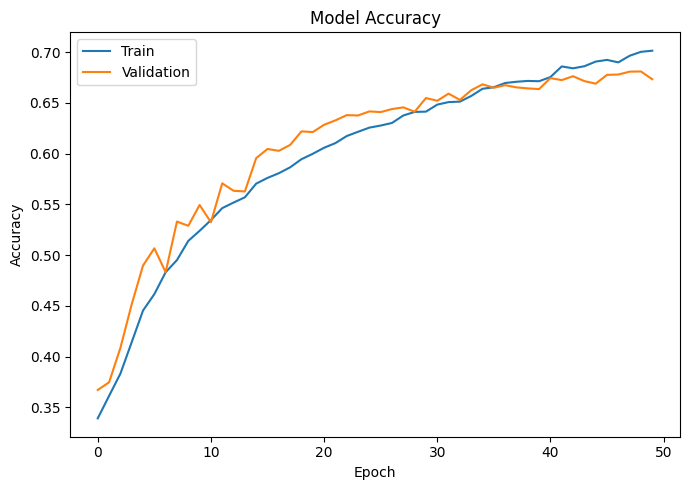

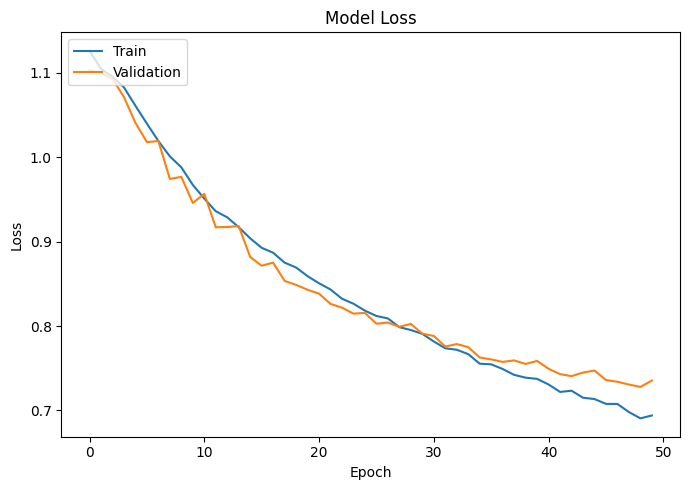

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("model_accuracy_lstm.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("model_loss_lstm.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np

# Get predicted probabilities
y_val_probs = model_lstm.predict(X_val_pad)

# Convert to predicted class labels (0, 1, 2)
y_val_pred = np.argmax(y_val_probs, axis=1)

# Convert to numpy arrays just in case
y_val_true = np.array(y_val)

# Find misclassified indices
wrong_indices = np.where(y_val_pred != y_val_true)[0]
print(f"Number of misclassified samples: {len(wrong_indices)}")

for idx in wrong_indices[:10]:  # change to [:10] for more
    print(f"\n Review: {X_val.iloc[idx]}")
    print(f"True label: {y_val_true[idx]}")
    print(f"Predicted:  {y_val_pred[idx]}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Number of misclassified samples: 1915

 Review: i have read that john ringo basically wrote the books in this series over the course of a few months of frantic writing . i have not read the others , but this was a gritty description of commando style spy antics combined with almost bdsm sexual scenes . the military scenes and descriptions are solid . however , they could not carry the story and the overall plot just felt a bit thin . the sexual scenes felt almost forced at time and did not expand much upon the plot . i could see a male reader wishing he was the main character with his almost mystical ability to pleasure a woman and win her adoration , but in a way the scenes detracted from the characters and their impact . perhaps i should have read books 1 and 2 first so i could get more into the story , but i was able to figure out the basic personalities of most of hte characters , even if i did not know how they became friends and allies . t

In [ ]:
# history.history is a dictionary that contains all metrics recorded during training

train_acc = history.history['accuracy']       # training accuracy per epoch
val_acc = history.history['val_accuracy']     # validation accuracy per epoch

print("Training accuracy per epoch:", train_acc)
print("Validation accuracy per epoch:", val_acc)


Training accuracy per epoch: [0.3391904830932617, 0.3612857162952423, 0.38319048285484314, 0.41419047117233276, 0.44538095593452454, 0.46152380108833313, 0.4830952286720276, 0.49509525299072266, 0.513952374458313, 0.5239047408103943, 0.534428596496582, 0.546238124370575, 0.551714301109314, 0.5569047331809998, 0.5703809261322021, 0.5759999752044678, 0.5806190371513367, 0.5864285826683044, 0.5944285988807678, 0.5997619032859802, 0.6057142615318298, 0.6102856993675232, 0.6172381043434143, 0.6214285492897034, 0.6255238056182861, 0.6275714039802551, 0.630142867565155, 0.6374762058258057, 0.640999972820282, 0.6412857174873352, 0.6481904983520508, 0.6506666541099548, 0.6511428356170654, 0.6567142605781555, 0.6638095378875732, 0.6652857065200806, 0.6694762110710144, 0.670714259147644, 0.6715238094329834, 0.671238124370575, 0.6753333210945129, 0.6858095526695251, 0.6839523911476135, 0.6859999895095825, 0.6905714273452759, 0.6922380924224854, 0.6898095011711121, 0.6963333487510681, 0.70019048452

In [ ]:
print(f"Final training accuracy: {train_acc[-1]:.4f}")
print(f"Final validation accuracy: {val_acc[-1]:.4f}")


Final training accuracy: 0.7013
Final validation accuracy: 0.6732


In [ ]:
from sklearn.metrics import classification_report
# Get predicted class indices from softmax probabilities
y_val_probs = model_lstm.predict(X_val_pad)
y_val_pred = np.argmax(y_val_probs, axis=1)

# Evaluate against true labels
print(classification_report(y_val, y_val_pred, zero_division=0))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      2000
           1       0.57      0.59      0.58      2000
           2       0.74      0.74      0.74      2000

    accuracy                           0.68      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.68      0.68      0.68      6000

